# Custom data training

## 학습데이터 디렉토리 구조

- train/validation/test 데이터셋 디렉토리를 각각 생성한다.
- images 폴더에 이미지 파일을, labels 폴더에 annotation 파일들을 저장한다.
    - annotation 파일은 대상 image 파일과 이름이 같아야 하고 확장자는 txt로 한다.
    
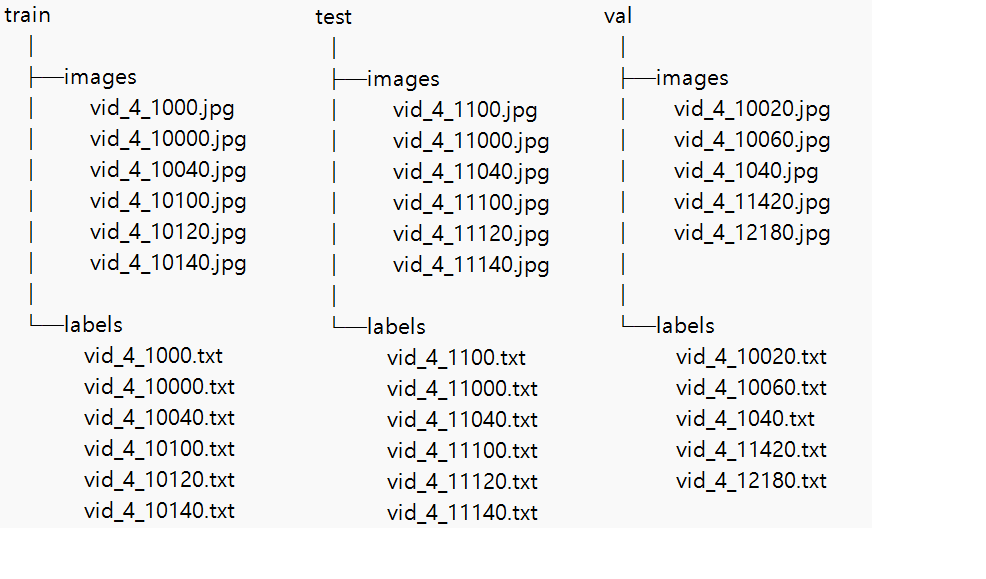

- YOLO object detection annotation 파일 형식
    - 공백을 구분자로 하는 csv 파일 형식
    - 한줄에 한개 object의 정보를 작성한다.
    - `label  center_x  center_y  bbox_width  bbox_height`  
        - bbox 위치정보는 image의 size 에 대한 비율로 정의한다.
        - 예)
            ```
            0.0    0.329934450147929     0.5672360751315789    0.25200291331360947   0.15803108815789477
            0.0    0.8026219956360947    0.5186609456578948    0.0975965039940829    0.08419689131578946
            ```
        

## 학습 설정 yaml 파일 작성
- 다음 항목들을 작성한다.
    - train: train dataset 저장경로
    - test: test dataset 저장경로
    - val: validation dataset 저장경로
        - train/test/validation 저장경로는 절대경로로 작성한다.
    - nc: class 개수
    - names: class name
    - 예) 
        ```yaml
        train: C:\datasets\train
        test: C:\datasets\test
        val: C:\datasets\val
        nc: 2
        names: ["car", "bus"]
        ```
        
> yaml: https://yaml.org/

## Training 하기 
### CLI

<b style='font-size:1.3em'>1.  학습시작</b>    
```bash
yolo detect train data=custom_data.yaml model=yolov8n.pt epochs=100 imgsz=640
```
- mode: `train` 지정
- data: 학습관련 설정 파일 경로로 다음을 설정한다.
    - train/test/validation dataset 저장 디렉토리 경로
    - class 개수
    - class name
- model: fine tuning 시 시작 Pretrained Model 파일 경로
    - 처음에서는 yolo에서 제공하는 weights 파일을 사용.
    - 추가 epoch만큼 더 학습 시키려는 경우 이전 학습에서 저장된 weight 파일의 경로를 지정한다.
- 주요 옵션
    - epochs: 반복횟수
    - imgsz: input image size
    - https://docs.ultralytics.com/cfg/
    
<b style='font-size:1.3em'>2. 이어서 학습하기</b>    
```bash
yolo detect train resume model=last.pt
```
- model: 마지막으로 저장된 파일 경로

### Python

1. YOLO객체 생성
    - Fine tuning할 경우 pretrained 모델파일 저장 경로를 지정한다.
    - 새로 학습할 경우 모델구조를 정의한 yaml 설정파일 저장 경로를 지정한다.
2. train
    - train 설정 yaml 파일의 위치와 train을 위한 정보들을 매개변수로 전달한다.

# 과일, 야채 image detection

In [3]:
fruits = ['Apple', 'Banana', 'Beetroot', 'Bitter_Gourd', 'Bottle_Gourd', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cherry', 'Chilli', 'Coconut', 'Cucumber', 
          'EggPlant', 'Ginger', 'Grape', 'Green_Orange', 'Kiwi', 'Maize', 'Mango', 'Melon', 'Okra', 'Onion', 'Orange', 'Peach', 'Pear', 'Peas',
          'Pineapple', 'Pomegranate', 'Potato', 'Radish', 'Strawberry', 'Tomato', 'Turnip', 'Watermelon']

In [2]:
len(fruits)

35

## Dataset 다운 및 복사

- https://universe.roboflow.com/bohni-tech/fruits-and-vegi/

In [1]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zhWgRnO8oFjce4idcMQ9")
project = rf.workspace("bohni-tech").project("fruits-and-vegi")
version = project.version(13)
dataset = version.download("yolov8")


ModuleNotFoundError: No module named 'roboflow'

## yaml 설정파일 작성

In [4]:
import os
import yaml   # yaml 형식 text 파일 <-----> dictionary
# dictionary를 yaml 형식 text 파일로 저장.
data_config = {
    "train":r"C:\Classes\deeplearning\datasets\fruit_vegi\train", 
    "val":r"C:\Classes\deeplearning\datasets\fruit_vegi\valid",
    "test":r"C:\Classes\deeplearning\datasets\fruit_vegi\test", 
    "nc":35, 
    "names":fruits
}
os.makedirs('data', exist_ok=True)
# data/data.yaml로 저장.
with open("data/data.yaml", "wt", encoding="utf-8") as fw:
    yaml.dump(data_config, fw)

## 학습

In [10]:
from ultralytics import YOLO
model = YOLO("models/yolov8m.pt") # fine tuning할 대상 모델파일 경로.
model.train(
    data="data/data.yaml", # 학습 설정 파일.
    epochs=1,
    patience=1,   # early stopping 설정. (patience epoch 동안 성능 개선이 안되면 학습 조기중단)
    batch=1,       #batch size (256 이하 - 메모리가 허용하는 크기.)
    imgsz=640,    # 입력 이미지 크기 (default: 640 - YOLO가 학습한 이미지의 크기.)
    optimizer="Adam",
    # resume=True # 이어서 학습
)

New https://pypi.org/project/ultralytics/8.2.25 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.23  Python-3.11.8 torch-2.3.0+cpu CPU (13th Gen Intel Core(TM) i5-1340P)
engine\trainer: task=detect, mode=train, model=models/yolov8m.pt, data=data/data.yaml, epochs=1, time=None, patience=1, batch=1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frame

100%|████████████████████████████████████████████████████████████| 755k/755k [00:00<00:00, 104MB/s]

Overriding model.yaml nc=80 with nc=35

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3795961  ultralytics.nn.modules.head.Detect           [35, [192, 384, 576]]         
Model summary: 295 layers, 25876585 parameters, 25876569 gradients, 79.2 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning C:\Classes\deeplearning\datasets\fruit_vegi\train\labels... 6573 images, 27 backgro


train: New cache created: C:\Classes\deeplearning\datasets\fruit_vegi\train\labels.cache


val: Scanning C:\Classes\deeplearning\datasets\fruit_vegi\valid\labels... 147 images, 1 backgrounds

val: New cache created: C:\Classes\deeplearning\datasets\fruit_vegi\valid\labels.cache


Plotting labels to C:\Classes\DA-35\runs\detect\train\labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Classes\DA-35\runs\detect\train
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.864      4.499      2.271          3        640:  57%|█████▋    | 375


KeyboardInterrupt: 

- <b style='font-size:1.5em'>결과</b>
```bash
Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
100/100      39.5G     0.7396     0.5254      1.153         98        640: 100%|██████████| 137/137 [01:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.05s/it]
                   all        147        613      0.768      0.846      0.877      0.652

100 epochs completed in 3.049 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.0.50 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25860025 parameters, 0 gradients, 78.8 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  3.00s/it]
                   all        147        613      0.803      0.826      0.876      0.652
                 Apple        147         22      0.806      0.864      0.897      0.772
                Banana        147          7      0.777      0.857      0.917      0.582
          Bitter_Gourd        147          4      0.683       0.25      0.351      0.125
               Cabbage        147         38       0.85      0.896      0.953      0.731
                Carrot        147          9          1      0.967      0.995      0.531
                Cherry        147          2      0.814          1      0.995      0.895
               Coconut        147          1      0.379          1      0.995      0.995
              Cucumber        147         13      0.901      0.846       0.86      0.648
                Ginger        147         14      0.902      0.929      0.952      0.592
                 Grape        147          6       0.85          1      0.995      0.752
          Green_Orange        147         12      0.894          1      0.995      0.913
                  Kiwi        147         13      0.681      0.988      0.936      0.702
                 Mango        147         33      0.966      0.879      0.964      0.749
                 Melon        147         31      0.845      0.529      0.709      0.394
                  Okra        147          2      0.921        0.5      0.502      0.301
                 Onion        147         15      0.798      0.867      0.938      0.618
                Orange        147         14      0.933      0.857      0.932      0.805
                 Peach        147         16      0.941      0.688      0.904      0.748
                  Pear        147          9       0.93          1      0.995      0.798
                  Peas        147          1      0.408          1      0.995      0.895
             Pineapple        147         30      0.844      0.733      0.812      0.463
           Pomegranate        147         18      0.928          1      0.995      0.836
                Potato        147        208      0.767      0.659      0.764      0.419
            Strawberry        147         19      0.937          1      0.995      0.807
                Tomato        147         50      0.796       0.74       0.88      0.583
                Turnip        147          3      0.297      0.333       0.45      0.203
            Watermelon        147         23      0.829      0.913      0.973      0.738
Speed: 1.3ms preprocess, 1.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3
```


## 평가
- YOLO객체 생성시 저장된 모델파일 경로를 넣어 생성한다.
    - 학습할때 사용한 yaml파일 학습때와 동일한 경로에 있어야 한다.
    - train/validation/test 데이터셋이 yaml에 등록된 경로에 있어야 한다.
- `YOLO.val()` 이용
    - DetMetrics 타입 객체에 결과를 담아 반환

In [ ]:
#### 저장된 모델을 loading
from ultralytics import YOLO
load_model = YOLO("....../best.pt")  # 저장된 모델은 data.yaml (학습 설정파일 정보를 가지고있다.)
metrics = load_model.val()   # data.yaml의 test:  경로의 데이터셋을 이용해서 검증. 
print("map50-95:", metrics.box.map) # IoU Threshold: 0.5 ~ 0.95 0.5씩 증가하면서 계산.
print("map50:", metrics.box.map50)  # IoU Threshold: 0.5
print("map75:", metrics.box.map75)  # IoU Threshold: 0.75
print("map50-95를 class별로 검증한 결과:", metrics.box.maps)

# 추론

In [ ]:
# yolo detect predict model=pretrained/runs/detect/train/weights/best.pt

In [11]:
model_path = "pretrained/runs/detect/train/weights/best.pt"
pretained_model = YOLO(model_path)

In [12]:
img_path = "01_test_image_detection/fruits"
results = pretained_model(img_path, save=True)


image 1/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\apple.jpg: 416x640 7 Apples, 186.7ms
image 2/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\banana.jpg: 384x640 1 Banana, 167.2ms
image 3/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\banana2.jpg: 640x640 1 Banana, 259.7ms
image 4/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\capsicum1.jpg: 640x640 4 Capsicums, 253.7ms
image 5/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\capsicum2.jpg: 480x640 2 Capsicums, 204.1ms
image 6/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\eggplant.jpg: 480x640 1 EggPlant, 1 Watermelon, 198.8ms
image 7/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_de

In [14]:
results[0].names

{0: 'Apple',
 1: 'Banana',
 2: 'Beetroot',
 3: 'Bitter_Gourd',
 4: 'Bottle_Gourd',
 5: 'Cabbage',
 6: 'Capsicum',
 7: 'Carrot',
 8: 'Cauliflower',
 9: 'Cherry',
 10: 'Chilli',
 11: 'Coconut',
 12: 'Cucumber',
 13: 'EggPlant',
 14: 'Ginger',
 15: 'Grape',
 16: 'Green_Orange',
 17: 'Kiwi',
 18: 'Maize',
 19: 'Mango',
 20: 'Melon',
 21: 'Okra',
 22: 'Onion',
 23: 'Orange',
 24: 'Peach',
 25: 'Pear',
 26: 'Peas',
 27: 'Pineapple',
 28: 'Pomegranate',
 29: 'Potato',
 30: 'Radish',
 31: 'Strawberry',
 32: 'Tomato',
 33: 'Turnip',
 34: 'Watermelon'}

In [15]:
len(results)  # 12: 추론한 이미지 개수.

12

In [16]:
img_path = "01_test_image_detection/fruits"
results = pretained_model(
    img_path, 
    save=True,
    project=r"c:\Classes\yolo_result", # 결과저장할 root directory 
    name="fruit_detection", # mode(predict) 역할의 디렉토리 경로.
)
# c:\Classes\yolo_result\fruit_detection  하위에 결과를 저장.


image 1/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\apple.jpg: 416x640 7 Apples, 184.0ms
image 2/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\banana.jpg: 384x640 1 Banana, 164.8ms
image 3/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\banana2.jpg: 640x640 1 Banana, 259.9ms
image 4/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\capsicum1.jpg: 640x640 4 Capsicums, 268.1ms
image 5/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\capsicum2.jpg: 480x640 2 Capsicums, 210.0ms
image 6/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_detection\fruits\eggplant.jpg: 480x640 1 EggPlant, 1 Watermelon, 210.4ms
image 7/12 C:\Classes\DA-35\09_vision_deeplearning\02_example_yolov8_pytorch\01_test_image_de